In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("csv/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


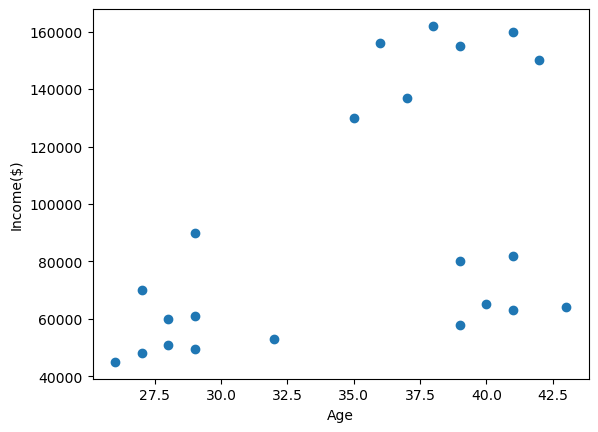

In [10]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [11]:
km = KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[['Age','Income($)']]) # without Name
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [13]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


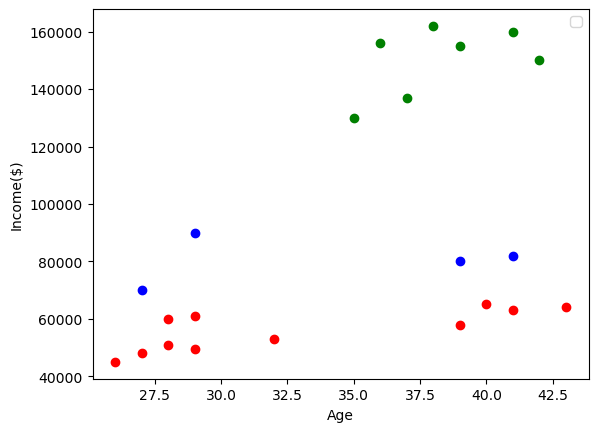

In [18]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0["Age"],df0["Income($)"], color = "red")
plt.scatter(df1["Age"],df1["Income($)"], color = "green")
plt.scatter(df2["Age"],df2["Income($)"], color = "blue")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [25]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df[["Income($)"]] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df[["Age"]] = scaler.transform(df[["Age"]])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [27]:
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


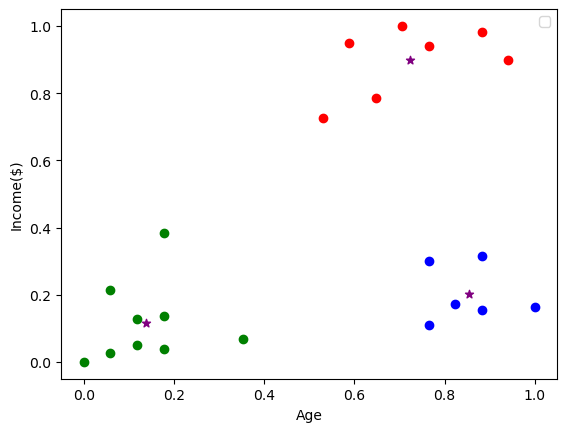

In [30]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0["Age"],df0["Income($)"], color = "red")
plt.scatter(df1["Age"],df1["Income($)"], color = "green")
plt.scatter(df2["Age"],df2["Income($)"], color = "blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "purple",marker="*")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [34]:
# Elbow Technique 
k_rng = range(1,10)
sse =[]

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [33]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553094,
 0.3698658919234831,
 0.282940458716048,
 0.2614010378895557,
 0.20152681785781484,
 0.15270536286861375,
 0.10383752586603558]

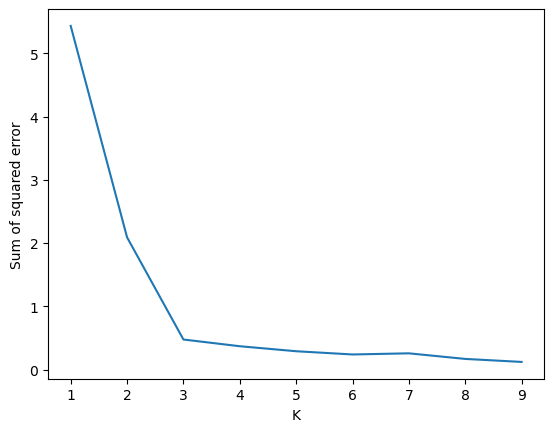

In [36]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()